In [ ]:
from __future__ import print_function

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth = 120)

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]),
    
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
print(len(training_data))

60000


In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:

print(training_data.targets)



tensor([9, 0, 0,  ..., 3, 0, 5])


In [ ]:
sample = next(iter(training_data))
sample_image, sample_label = sample
# image size
print(sample_image.shape)

torch.Size([1, 28, 28])


label: 9


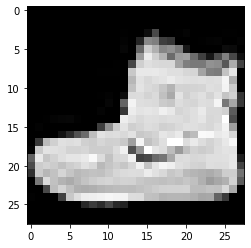

In [ ]:
plt.imshow(sample_image.squeeze(), cmap='gray')
print('label:', sample_label)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

# Train CNN

def TrainCNN(epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer):



  batches = 0
  train_losses = list()
  val_losses = list()
  val_acces = list()
  batch_lst = list()
  val_loss = 0

  for epoch in range(1,epochs+1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(train_dataloader):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          loss = loss_fn(outputs, labels)
          loss.backward() 
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 100 == 99:    # print every 2000 mini-batches

              model.eval()
            
              correct = 0


              for j, val_data in enumerate(test_dataloader):
                  val_X, val_y = val_data


                  outputs = model(val_X)

                  v_loss = loss_fn(outputs, val_y)
                  val_loss += v_loss.item()

                  preds = outputs.data.max(1, keepdim=True)[1]

                  correct += preds.eq(val_y.view_as(preds)).cpu().sum().item()

              log = f"epoch: {epoch} {i+1} " \
                  f"train_loss: {running_loss / 100:.3f} " \
                  f"val_loss: {val_loss / 100:.3f} " \
                  f"Val Acc: {correct/len(test_dataloader.dataset):.3f}"


              train_losses.append(running_loss / 100)
              val_losses.append(val_loss / 100)
              val_acces.append(correct/len(test_dataloader.dataset))
              batches += 100
              batch_lst.append(batches)

              val_loss = 0

              print(log)

              running_loss = 0.0

              model.train()
              writer.flush()

              


  print('Finished Training')
  writer.close()

  plt.figure(figsize=(16,6))
  plt.plot(batch_lst, train_losses, '-o', label='Training loss')
  plt.plot(batch_lst, val_losses, '-o', label='Testing loss')
  plt.legend()
  plt.title('Learning curves')
  plt.xlabel('Batches')
  plt.ylabel('Loss')
  plt.xticks(batch_lst,rotation = 90)
  plt.tight_layout()


  plt.show()




SyntaxError: ignored

In [ ]:
# Define model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epoch: 1 100 train_loss: 0.829 val_loss: 0.985 Val Acc: 0.751
epoch: 1 200 train_loss: 0.550 val_loss: 0.827 Val Acc: 0.813
epoch: 1 300 train_loss: 0.499 val_loss: 0.836 Val Acc: 0.806
epoch: 1 400 train_loss: 0.461 val_loss: 0.730 Val Acc: 0.830
epoch: 1 500 train_loss: 0.447 val_loss: 0.756 Val Acc: 0.827
epoch: 1 600 train_loss: 0.430 val_loss: 0.686 Val Acc: 0.843
epoch: 1 700 train_loss: 0.404 val_loss: 0.735 Val Acc: 0.829
epoch: 1 800 train_loss: 0.419 val_loss: 0.653 Val Acc: 0.853
epoch: 1 900 train_loss: 0.408 val_loss: 0.663 Val Acc: 0.847
epoch: 2 100 train_loss: 0.381 val_loss: 0.633 Val Acc: 0.855
epoch: 2 200 train_loss: 0.368 val_loss: 0.640 Val Acc: 0.853
epoch: 2 300 train_loss: 0.370 val_loss: 0.636 Val Acc: 0.857
epoch: 2 400 train_loss: 0.366 val_loss: 0.639 Val Acc: 0.853
epoch: 2 500 train_loss: 0.348 val_loss: 0.633 Val Acc: 0.857
epoch: 2 600 train_loss: 0.353 val_loss: 0.614 Val Acc: 0.861
epoch: 2 700 train_loss: 0.342 val_loss: 0.657 Val Acc: 0.848
epoch: 2

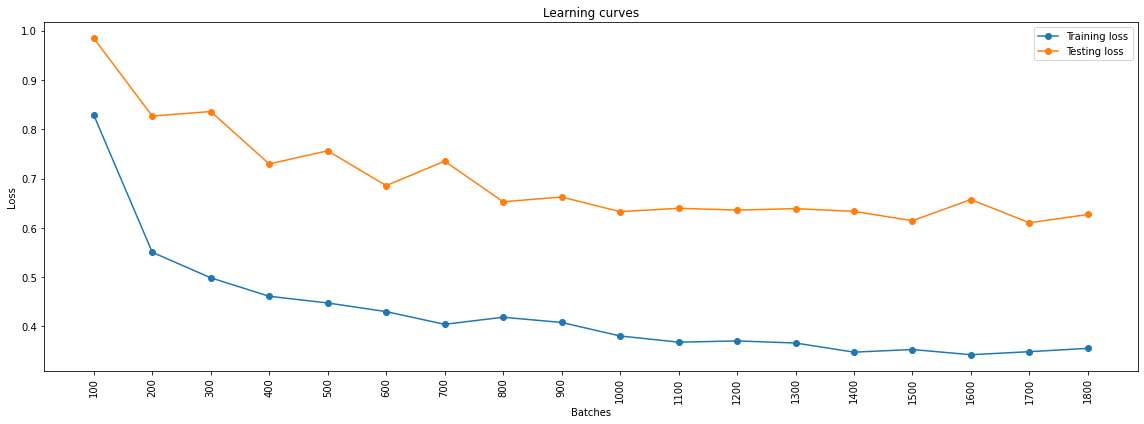

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 2

TrainCNN(epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer)

In [ ]:
def PredictModel(model):
  classes = [
      "T-shirt/top",
      "Trouser",
      "Pullover",
      "Dress",
      "Coat",
      "Sandal",
      "Shirt",
      "Sneaker",
      "Bag",
      "Ankle boot",
  ]

  model.eval()
  x, y = test_data[0][0], test_data[0][1]
  with torch.no_grad():
      pred = model(x)
      predicted, actual = classes[pred[0].argmax(0)], classes[y]
      print(f'Predicted: "{predicted}", Actual: "{actual}"')

In [ ]:

# Output size formula
# n x n input
# f x f filter/kernel
# p is padding
# s is stride

# then output size will be (n - f + 2p)/s + 1
# Get cpu or gpu device for training.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


class FMNISTCNN(nn.Module):
    def __init__(self):
        super(FMNISTCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=6, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features= 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features= 60, out_features = 10)


    def forward(self, tensor):
        
          # hidden layer 1 - also called the input layer
          tensor = self.conv1(tensor)
          tensor = F.relu(tensor)
          tensor = F.max_pool2d(tensor, kernel_size = 2, stride= 2)
        
          # hidden layer 2
        
          tensor = self.conv2(tensor)
          tensor = F.relu(tensor)
          tensor = F.max_pool2d(tensor, kernel_size = 2, stride = 2)
        
          #hidden layer 3
        
          tensor = tensor.reshape(-1, 12 * 4* 4)
          tensor = self.fc1(tensor)
          tensor = F.relu(tensor)
        
          #hidden layer 4
        
          tensor = self.fc2(tensor)
          tensor = F.relu(tensor)
        
          #output layer
        
          tensor = self.out(tensor)
        
          return tensor
    


Using cpu device


In [ ]:
modelCNN = FMNISTCNN().to(device)
print(modelCNN)

FMNISTCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


epoch: 1 100 train_loss: 1.440 val_loss: 1.427 Val Acc: 0.640
epoch: 1 200 train_loss: 0.813 val_loss: 1.212 Val Acc: 0.703
epoch: 1 300 train_loss: 0.704 val_loss: 1.058 Val Acc: 0.750
epoch: 1 400 train_loss: 0.643 val_loss: 0.987 Val Acc: 0.767
epoch: 1 500 train_loss: 0.600 val_loss: 0.940 Val Acc: 0.778
epoch: 1 600 train_loss: 0.558 val_loss: 0.914 Val Acc: 0.780
epoch: 1 700 train_loss: 0.537 val_loss: 0.951 Val Acc: 0.765
epoch: 1 800 train_loss: 0.525 val_loss: 0.826 Val Acc: 0.799
epoch: 1 900 train_loss: 0.518 val_loss: 0.822 Val Acc: 0.805
epoch: 2 100 train_loss: 0.480 val_loss: 0.785 Val Acc: 0.813
epoch: 2 200 train_loss: 0.482 val_loss: 0.768 Val Acc: 0.815
epoch: 2 300 train_loss: 0.468 val_loss: 0.779 Val Acc: 0.819
epoch: 2 400 train_loss: 0.460 val_loss: 0.761 Val Acc: 0.822
epoch: 2 500 train_loss: 0.454 val_loss: 0.787 Val Acc: 0.814
epoch: 2 600 train_loss: 0.431 val_loss: 0.695 Val Acc: 0.838
epoch: 2 700 train_loss: 0.424 val_loss: 0.747 Val Acc: 0.825
epoch: 2

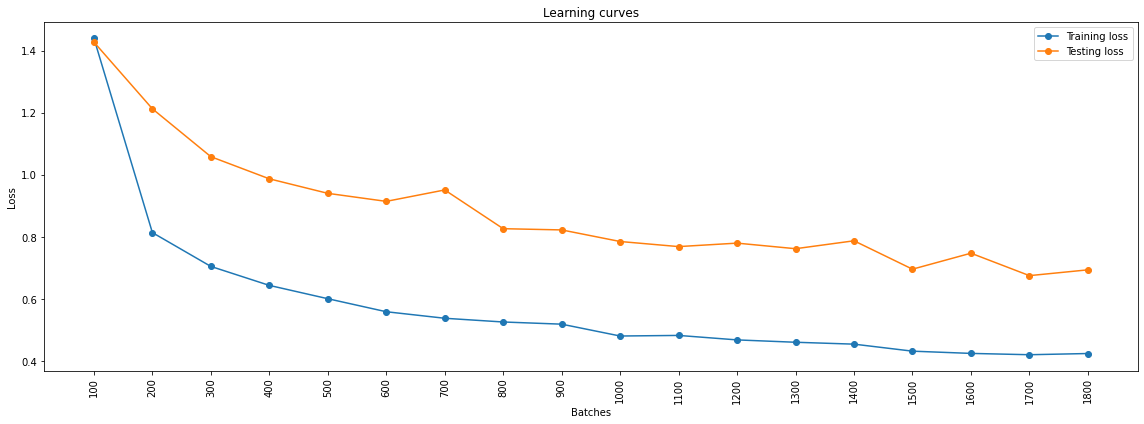

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCNN.parameters(), lr=1e-3)
epochs = 2

TrainCNN(epochs, train_dataloader, test_dataloader, modelCNN, loss_fn, optimizer)

In [ ]:



class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()

        # Input 1 channel(b/c black and white) with 32 filters each with kernel_size=3 (3*3)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        #self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)

        self.batch_norm1 = nn.BatchNorm2d(32)
        self.batch_norm2 = nn.BatchNorm2d(64)
        self.batch_norm3 = nn.BatchNorm2d(128)
        #self.batch_norm4 = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.dropout25 = nn.Dropout2d(p=0.25)

        # Fully connected layer
        self.fc1 = nn.Linear(128*3*3,32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.dropout25(x)
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))
        x = self.dropout25(x)
        x = self.pool(F.relu(self.batch_norm3(self.conv3(x))))
        x = self.dropout25(x)
        #x = self.pool(F.relu(self.batch_norm4(self.conv4(x))))
        #x = self.dropout25(x)

        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

In [ ]:
model_2_CNN = CNNNet().to(device)
print(model_2_CNN)

CNNNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout25): Dropout2d(p=0.25, inplace=False)
  (fc1): Linear(in_features=1152, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


epoch: 1 100 train_loss: 0.886 val_loss: 0.892 Val Acc: 0.779
epoch: 1 200 train_loss: 0.561 val_loss: 0.727 Val Acc: 0.831
epoch: 1 300 train_loss: 0.495 val_loss: 0.709 Val Acc: 0.828
epoch: 1 400 train_loss: 0.449 val_loss: 0.665 Val Acc: 0.844
epoch: 1 500 train_loss: 0.441 val_loss: 0.673 Val Acc: 0.846
epoch: 1 600 train_loss: 0.407 val_loss: 0.577 Val Acc: 0.866
epoch: 1 700 train_loss: 0.387 val_loss: 0.599 Val Acc: 0.861
epoch: 1 800 train_loss: 0.396 val_loss: 0.577 Val Acc: 0.860
epoch: 1 900 train_loss: 0.377 val_loss: 0.539 Val Acc: 0.875
epoch: 2 100 train_loss: 0.350 val_loss: 0.521 Val Acc: 0.882
epoch: 2 200 train_loss: 0.346 val_loss: 0.532 Val Acc: 0.881
epoch: 2 300 train_loss: 0.348 val_loss: 0.495 Val Acc: 0.885
epoch: 2 400 train_loss: 0.341 val_loss: 0.514 Val Acc: 0.885
epoch: 2 500 train_loss: 0.332 val_loss: 0.534 Val Acc: 0.878
epoch: 2 600 train_loss: 0.330 val_loss: 0.482 Val Acc: 0.891
epoch: 2 700 train_loss: 0.326 val_loss: 0.490 Val Acc: 0.885
epoch: 2

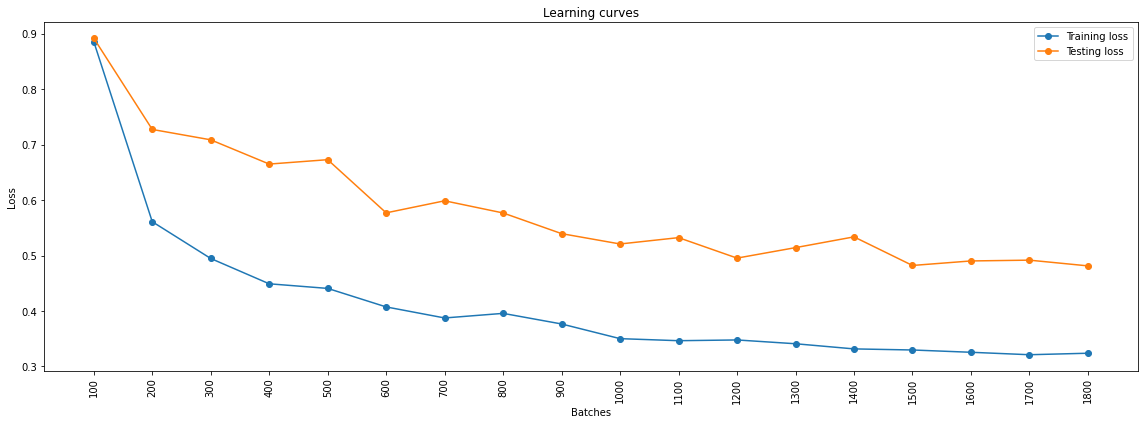

In [ ]:
# YOUR CODE HERE

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2_CNN.parameters(), lr=1e-3)
epochs = 2

TrainCNN(epochs, train_dataloader , test_dataloader, model_2_CNN, loss_fn , optimizer )

# YOUR CODE ENDS HERE